In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing Packages
import warnings
warnings.filterwarnings('ignore')     # ==> surpress the warnings
import pandas as pd                   # ==> pandas for data analysis
import numpy as np                    # ==> numpy for linear algebra 
import tensorflow as tf               # ==> tensorflow famous low-level deep learning framework
from tensorflow import keras          # ==>  keras is library for high-level deep learning
import matplotlib.pyplot as plt       # ==>  matplotib for data visualization
import seaborn as sns                 # ==>  seaborn for advanced visulization

## Download data:


In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_full, y_full), (X_test, y_test)=fashion_mnist.load_data()
X_train, X_valid=X_full[:50000], X_full[50000:]
y_train, y_valid=y_full[:50000], y_full[50000:]
X_train.shape

4422102/4422102 [==============================] - 1s 0us/step


(50000, 28, 28)

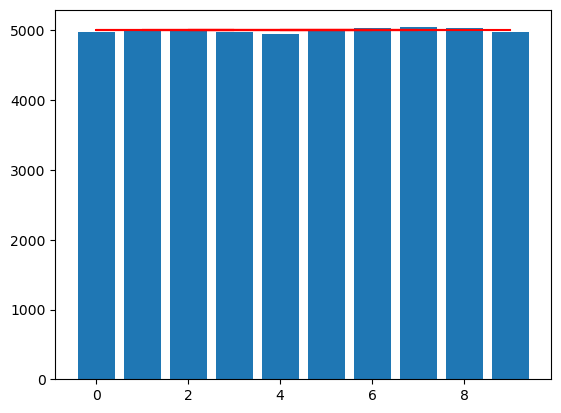

In [4]:
df=pd.DataFrame(y_train)
df.tail()
label_distributions=[0 for k in range(10)]
for i in range(y_train.shape[0]):
    for j in range(10):
        if y_train[i]==j:
           label_distributions[j]+=1
label_distributions
#plt.hist(label_distributions, bins=10)
withh=5200
from collections import Counter
label_distributions=Counter(y_train)
label_distributions
label_distributions=Counter(y_train)
x,y=label_distributions.keys(), label_distributions.values()
plt.bar(x,y)
plt.plot(x,[5000 for i in range(10)], color='red')
plt.show()
 


as we can observe the target values distributed very well.

In [ ]:
X_train[:1].shape

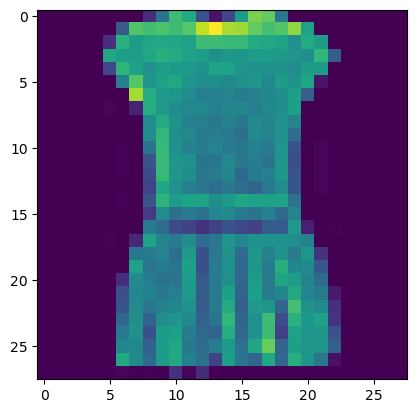

In [5]:
def image(sample):
    import matplotlib.pyplot as plt
    assert sample<X_train.shape[0]# and feature < X_train.shape[1]
    image=X_train[sample]
    return plt.imshow(image)
    
image(3)

## Sequential Model in Keras :

In [6]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

Seq_model=keras.models.Sequential([
          layers.Flatten(input_shape=[28,28]),
          layers.Dense(300, activation='relu'),
          layers.Dense(100, activation='relu'), 
          layers.Dense(10, activation='softmax')
])

# Compiling the model
Seq_model.compile(optimizer='rmsprop',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

Seq_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training  The model
Seq_model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy/Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()


plot_hist(history)

In [7]:
history=Seq_model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))


Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 3.2384 - accuracy: 0.6337 - val_loss: 0.9679 - val_accuracy: 0.6753
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9737 - accuracy: 0.6789 - val_loss: 0.8626 - val_accuracy: 0.6973
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9204 - accuracy: 0.6930 - val_loss: 0.9534 - val_accuracy: 0.6568
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9027 - accuracy: 0.6988 - val_loss: 0.8266 - val_accuracy: 0.6875
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8496 - accuracy: 0.7037 - val_loss: 0.8743 - val_accuracy: 0.6574
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8682 - accuracy: 0.7032 - val_loss: 0.9699 - val_accuracy: 0.7084
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8824 - accuracy: 0.7042 - val_loss: 0.8707 - val_accuracy:

In [ ]:
def ploting_model(model):
    return tf.keras.utils.plot_model(
       model,
       to_file="model.png",
       show_shapes=True)

ploting_model(Seq_model)

In [ ]:
history.history.keys()

djkfk dskfkld;gl z;dslflskdls

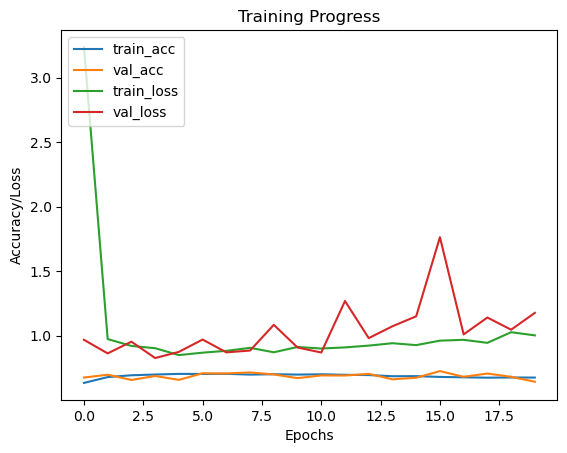

In [9]:
def plot_hist(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy/Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()
plot_hist(history)

there is a lot of fluctuations in the curves of $losses$ and $accuracies$, that reflect that model suffer from overfitting...

In [ ]:
def ploting_model(model):
    return tf.keras.utils.plot_model(
       model,
       to_file="model.png",
       show_shapes=True)

ploting_model(Seq_model)

## Optimization Of The Model:

we can enhance our model through :

==> Number of epochs

==> K-cross validation 

==> Fine-Tune the number of layers, number of neurons in each layers, learning-rate.

==> Choosing the right optimiers.

==> EarlyStopping

==> Choosing the good losses

==> Regulirization :l1-regulirization, l2-Regulirization, both... 

==> Batch-Normalization

==>Dropout

 ## K-CROSS-VALIDATION:

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Making The Confusion Matrix
from sklearn.metrics import confusion_matrix
# --> cm=confusion_matrix(y_test, y_pred)
# --> sns.heatmap(cm, annot=True)
from sklearn.model_selection import KFold
# --> cv=KFold(n_splits=7, shuffle=True, random_state=42)
fold_no=1
acc_per_fold=[]     # save accuracy from each fold




## Epoch's Number:

In [ ]:
def train_valid_rate(epoch):

we can enhance our model through :
==> K-cross validation 
==> Fine-Tune the number of layers, number of neurons in eac

we can enhance our model through :
==> K-cross validation 
==> Fine-Tune the number of layers, number of neurons in ea

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import keras_tuner

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner

In [ ]:
pass

In [16]:
import numpy as np
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Flatten, Dense, InputLayer
import keras_tuner
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings                   #==> supress warning
warnings.filterwarnings('ignore')

# Create THe Input Layer Of The  Sequential Model
model=keras.models.Sequential()
model.add(InputLayer(input_shape=[28,28]))  # ==> X_train[1:].shape==(1,28,28)

def generating_models(hp=keras_tuner.HyperParameters(), tuning_with_keras=False, tuning_with_Sklearn=True, n_hiddens=5,init_weights='he_uniform',
      n_units=30, optimizer='adam', activation='relu', learning_rate=0.01,active_dropout=True):
    
    if tuning_with_keras:
        tuning_with_sklearn=not tuning_with_sklearn
        def build_model1(hp):
             model1=Sequential()
             model1.add(layers.Flatten())
             model1.add(layers.Dense(
                 units=hp.Int('units', min_value=50, max_value=110, step=45), 
             activation=hp.Choice('activation', ['relu', 'tanh'])))
             if active_dropout:
                model1.add(layers.Dropout(rate=0.25))
             model1.add(layers.Dense(10, activation='softmax'))
             # Compile the Model
             optimizer=hp.Choice('optimizer', ['Adam', 'Nadam', 'sgd'])                       
             model.compile(optimizer=keras.optimizers.optimizer(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
             return model1
        return build_model1(n_units=20,init_weights='uniform', optimizer='Adam' )
        
    else:
        tuning_with_keras=not tuning_with_keras
        def build_model(n_hiddens=3, n_units=30, learning_rate=3e-3, init_weights='uniform', input_shape=[28, 28]):
            model = keras.models.Sequential()
            model.add(keras.layers.InputLayer(input_shape=input_shape))
            for layer in range(n_hiddens):
                model.add(keras.layers.Dense(n_units, activation="relu"))
            model.add(keras.layers.Dense(10))
            optimizer = keras.optimizers.SGD(lr=learning_rate)
            model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
            return model
        return build_model(n_hiddens=3,n_units=20,init_weights='uniform' )
            
keras_clf=KerasClassifier(generating_models, epochs=40, callbacks=[keras.callbacks.EarlyStopping(patience=10)])
#model.fit(X_train, y_train ,epochs=40, validation_data=(X_valid, y_valid))
params_distribution = {
    "n_hiddens": [0, 1, 2, 3],
    "n_units": np.arange(1, 100).tolist()}

rnd_search_cv = GridSearchCV(estimator=keras_clf, param_grid=params_distribution,
                              error_score='raise' ,n_jobs=16, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
 #callbacks=[keras.callbacks.EarlyStopping(patience=10)])
rnd_search_cv.best_params          
                          
#generating_models(hp=keras_tuner.HyperParameters())
#hp = keras_tuner.HyperParameters()
#tuner = keras_tuner.RandomSearch( hypermodel=generating_models, max_trials=3,
#    objective='val_accuracy',
#    overwrite=True,
#    project_name="helloworld")
#tuner.search(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))   

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 170, in <module>
      exitcode = process_obj._bootstrap()
    File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
      self.run()
    File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 108, in run
      self._target(*self._args, **self._kwargs)
    File "/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 428, in _process_worker
      r = call_item()
    File "/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 275, in __call__
      return self.fn(*self.args, **self.kwargs)
    File "/opt/conda/lib/python3.10/site-packages/joblib/_parallel_backends.py", line 620, in __call__
      return self.func(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 288, in __call__
      return [func(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 288, in <listcomp>
      return [func(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 123, in __call__
      return self.function(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
      estimator.fit(X_train, y_train, **fit_params)
    File "/opt/conda/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
      return super().fit(x, y, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
      history = self.model.fit(x, y, **fit_args)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1031]

## from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Flatten, Dense, InputLayer
import keras_tuner
import warnings
warnings.filterwarnings('ignore')

# Create THe Input Layer Of The  Sequential Model
model=keras.models.Sequential()
model.add(InputLayer(input_shape=[28,28]))  # ==> X_train[1:].shape==(1,28,28)


def generating_models(hp=keras_tuner.HyperParameters(), tuning_with_keras=False, tuning_with_Sklearn=True, n_hiddens=5,init_weights='he_uniform',
      n_units=30, optimizer='adam', activation='relu', learning_rate=0.01,active_dropout=True):
    
    if tuning_with_keras:
        tuning_with_sklearn=not tuning_with_sklearn
        def build_model1(hp):
             model1=Sequential()
             model1.add(layers.Flatten())
             model1.add(layers.Dense(
                 units=hp.Int('units', min_value=50, max_value=110, step=45), 
             activation=hp.Choice('activation', ['relu', 'tanh'])))
             if active_dropout:
                model1.add(layers.Dropout(rate=0.25))
             model1.add(layers.Dense(10, activation='softmax'))
             # Compile the Model
             optimizer=hp.Choice('optimizer', ['Adam', 'Nadam', 'sgd'])                       
             model.compile(optimizer=keras.optimizers.optimizer(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
             return model1
        return build_model1(n_units=20,init_weights='uniform', optimizer='Adam' )
        
    else:
        tuning_with_keras=not tuning_with_keras
        def build_model(n_hiddens=3, n_units=30, learning_rate=3e-3, init_weights='uniform', input_shape=[28, 28]):
            model = keras.models.Sequential()
            model.add(keras.layers.InputLayer(input_shape=input_shape))
            for layer in range(n_hiddens):
                model.add(keras.layers.Dense(n_units, activation="relu"))
            model.add(keras.layers.Dense(10))
            optimizer = keras.optimizers.SGD(lr=learning_rate)
            model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
            return model
        return build_model(n_hiddens=3,n_units=20,init_weights='uniform' )
            
keras_clf=KerasClassifier(generating_models, epochs=40, callbacks=[keras.callbacks.EarlyStopping(patience=10)])
model.fit(X_train, y_train ,epochs=40, validation_data=(X_valid, y_valid))

params_distribution={'activation': ['softmax' 'relu', 'sigmoid', 'tanh', 'linear', 'hard_sigmoid'],
                    'optimizer': ['SGD', 'Adam', 'RMSprop', 'Nadam'],
                    'init_weights':  ['uniform', 'normal', 'he_uniform', 'lecun_uniform', 'he_normal', 'glorot_uniform'],
                     'n_units' : [i for i in range(20, 200, 20)], 
                      'n_hiddens' : [ i for i in range(1, 7, 1)]}

#rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=3)
#rnd_search_cv.fit(X_train, y_train, epochs=100,
 #validation_data=(X_valid, y_valid),
 #callbacks=[keras.callbacks.EarlyStopping(patience=10)])


             
                
            
                          
#generating_models(hp=keras_tuner.HyperParameters())
#hp = keras_tuner.HyperParameters()
#tuner = keras_tuner.RandomSearch( hypermodel=generating_models, max_trials=3,
#    objective='val_accuracy',
#    overwrite=True,
#    project_name="helloworld")
#tuner.search(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))                        

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#model=KerasClassifier(build_fn=generating_model, epochs=10, batch_size=100, verbose=1)
params_distribution={'activation': ['softmax' 'relu', 'sigmoid', 'tanh', 'linear', 'hard_sigmoid'],
                    'optimizer': ['SGD', 'Adam', 'RMSprop', 'Nadam'],
                    'init_weights':  ['uniform', 'normal', 'he_uniform', 'lecun_uniform', 'he_normal', 'glorot_uniform'],
                     'n_units' : [i for i in range(20, 200, 20)], 
                      'n_hiddens' : [ i for i in range(1, 7, 1)]}

params_distribution



### from tensorflow import keras
from keras.models import Sequential
model=Sequential()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
     model = keras.models.Sequential()
     model.add(keras.layers.InputLayer(input_shape=input_shape))
     for layer in range(n_hidden):
         model.add(keras.layers.Dense(n_neurons, activation="relu"))
     model.add(keras.layers.Dense(10, activation='softmax'))
     optimizer = keras.optimizers.SGD(lr=learning_rate)
     model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
     return model
    
keras_clf=KerasClassifier(build_model)
keras_clf.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid))
 #callbacks=[keras.callbacks.EarlyStopping(patience=10)])



In [8]:
import tensorflow as tf

def f(w1, w2):
    return 3*w1**2+tf.stop_gradient(2*w1*w2)

w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
 z = f(w1, w2)
gradients = tape.gradient(z, w2)

x=tf.Variable([100.])

@tf.custom_gradient
def my_better_softplus(z):
   exp = tf.exp(z)
   def my_softplus_gradients(grad):
     return grad / (1 + 1 / exp)
   return tf.math.log(exp + 1), my_softplus_gradientstf.custom_gradient


alternatively you can used as tf.function as decorator, these actually more common:

In [10]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

@tf.function 
def tf_cube(x)->float:
    return x**3
tf_cube(2)
tf_cube.python_function(2)

8

## The Data API:

In [13]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

X=tf.range(10)    #==> any dataa tensor
dataset=tf.data.Dataset.from_tensor_slices(X)

for item in dataset: 
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


## Chaining Transformations:

In [14]:
dataset=dataset.repeat(3).batch(7, drop_remainder=True)
for item in dataset: 
    print(item)
dataset

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


<_BatchDataset element_spec=TensorSpec(shape=(7,), dtype=tf.int32, name=None)>

In [20]:
dataset=dataset.map(lambda x: 2*x)
for item in dataset: 
    print(item)

tf.Tensor([  0  64 128 192 256 320 384], shape=(7,), dtype=int32)
tf.Tensor([448 512 576   0  64 128 192], shape=(7,), dtype=int32)
tf.Tensor([256 320 384 448 512 576   0], shape=(7,), dtype=int32)
tf.Tensor([ 64 128 192 256 320 384 448], shape=(7,), dtype=int32)
